# MLP Regressor  

`California housing dataset`  
[video link](https://youtu.be/zsPNGpLFqgg)  

**Import libraries**  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sklearn
from sklearn import datasets

In [2]:
# Import the libraries for performing regression
from importlib import import_module
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_validate, ShuffleSplit

In [3]:
np.random.seed(306)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

**Load dataset**  

In [4]:
# Load dataset
dataset = sklearn.datasets.fetch_california_housing()
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [5]:
print(f"Shape of training data: {X_train.shape}")
print(f"Shape of testing data: {X_test.shape}")

Shape of training data: (16512, 8)
Shape of testing data: (4128, 8)


## Fit a pipeline to implement MLPRegressor on California housing dataset  

Let us train a MLP regressor with three hidden layers each with 32 neurons.  

In [6]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('regressor', MLPRegressor(hidden_layer_sizes=(32)))])

cv_results = cross_validate(pipe,
                            X_train,
                            y_train,
                            cv=cv,
                            scoring='neg_mean_absolute_percentage_error',
                            return_train_score=True,
                            return_estimator=True,
                            n_jobs=2)

mlp_train_error = -1 * cv_results['train_score']
mlp_test_error = -1 * cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n"
        f"{mlp_train_error.mean():.3f} +/- {mlp_train_error.std():.3f}")
print(f"Mean absolute error of linear regression model on the test set:\n"
        f"{mlp_test_error.mean():.3f} +/- {mlp_test_error.std():.3f}")

Mean absolute error of linear regression model on the train set:
0.214 +/- 0.005
Mean absolute error of linear regression model on the test set:
0.214 +/- 0.009


In [7]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', MLPRegressor(hidden_layer_sizes=32))])

In [8]:
mean_absolute_percentage_error(y_train, pipe.predict(X_train))

0.2051761691640708

In [9]:
mean_absolute_percentage_error(y_test, pipe.predict(X_test))


0.21680164186883186

Text(0, 0.5, 'predicted')

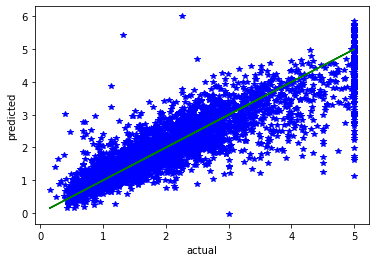

In [11]:
plt.plot(y_test, pipe.predict(X_test), 'b*')
plt.plot(y_test, y_test, 'g-')
plt.xlabel('actual')
plt.ylabel('predicted')